    # regularized linear model to understand the significance of each feature and feature correlation
    # what has been done by Jia Xu:
        * data cleaning
        * individual feature exploration: influence of categorical variables on SalePrice (one way ANOVA)
        * pairwise feature exploration: correlation (heatmap)
        * feature transform: scaling, add polynomial terms
    # what to be done in this part:
        * feature selection
    # strategy:
        (1) Do a "rough" ridge model to reveal correlation among features
        (2) According to "rough" ridge model, correlation is strong. So a randomlized Lasso model is applied to select features and remove "redundant" or "correlated" features.
       

# import system libs

In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from assemble import DataStream, DataDescribe
from sklearn.linear_model import RandomizedLasso

# load cleaned data

In [2]:
X_train = pd.read_csv("X_train_update.csv")
y_train_log1p = pd.read_csv("y_train_log1p_update.csv")
X_test = pd.read_csv("X_test_update.csv")
ref_y_pred_log1p = pd.read_csv("y_pred_log1p_update.csv")

#file1 = open("num_feature_name.txt", "r")
#s = file1.read().splitlines()
#s=s[:-1]
#file1.close()
#numeric = s

#file1 = open("encode_feature_name.txt", "r")
#s = file1.read().splitlines()
#s=s[:-1]
#file1.close()
#encoded = s

#print (encoded)
#y_train_log1p.drop("Unnamed*")
#X_train.head()
#y_train_log1p.head()
#X_test.head()
#ref_y_pred_log1p.head()

# Display numeric features

('Excluding the columns as following:', ['Id', 'SalePrice'])
('The numerical features are', ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley_E', 'BedroomAbvGr', 'BldgType_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1_E', 'BsmtFinType2_E', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual_E', 'BsmtQual_E_S2', 'BsmtQual_E_S3', 'BsmtQual_E_Sq', 'BsmtUnfSF', 'CentralAir_E', 'Condition1_E', 'Condition2_E', 'Electrical_E', 'EnclosedPorch', 'ExterCond_E', 'ExterQual_E', 'ExterQual_E_S2', 'ExterQual_E_S3', 'ExterQual_E_Sq', 'ExterScore', 'ExterScore_S2', 'ExterScore_S3', 'ExterScore_Sq', 'Exterior1st_E', 'Exterior2nd_E', 'Fence_E', 'FireplaceQu_E', 'FireplaceScore', 'Fireplaces', 'FlrSF', 'Foundation_E', 'FullBath', 'Functional_E', 'GarageArea', 'GarageCars', 'GarageCars_S2', 'GarageCars_S3', 'GarageCars_Sq', 'GarageCond_E', 'GarageFinish_E', 'GarageGrade', 'GarageQual_E', 'GarageScore', 'GarageType_E', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'HeatingQC_E', 'Heating_E', 'Ho

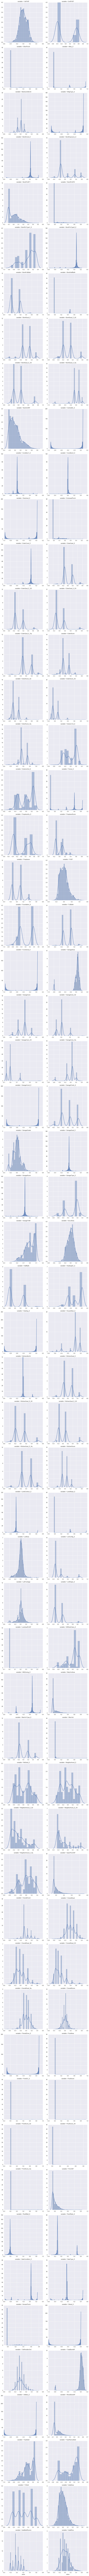

In [4]:
#frames = [X_train[numeric],y_train_log1p]
frames = [X_train,y_train_log1p]
train = pd.concat(frames)
#train.head()
Train_explore = DataDescribe(train)
#Train_explore.summary()
Train_explore.show_numerical(["Id", "SalePrice"])
#Train_explore["SalePrice"]
#Train_explore.show_category(exclude=["Id", "SalePrice"], response="SalePrice")

# A rough ridge model

In [5]:

#from sklearn.metrics import r2_score

model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train_log1p) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

### get linear correlation among features

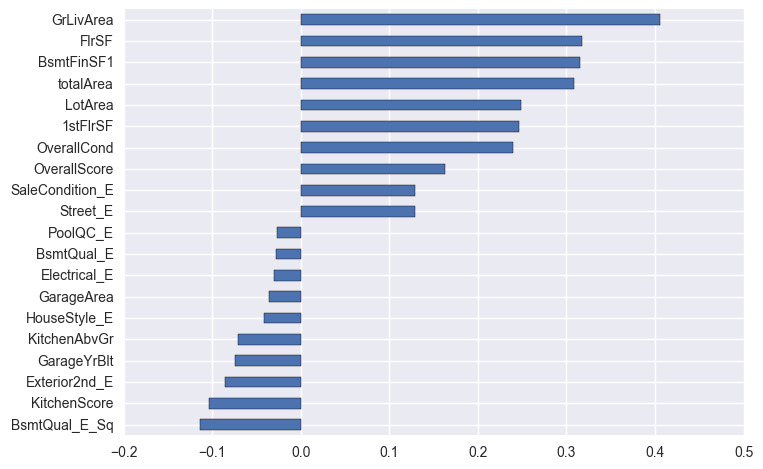

In [6]:
coef = pd.Series(model_ridge.coef_[0], index = X_train.columns).sort_values()
imp_coef = pd.concat([coef.head(10), coef.tail(10)])
imp_coef.plot(kind = "barh")

### It is clear that many features are "correlated" or even "redundant". This will cause overfitting!

# Randomlized Lasso
    http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RandomizedLasso.html
    http://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/

In [21]:
rlasso = RandomizedLasso(alpha=2e-4, max_iter=50000,random_state=1,n_resampling=500)

#X_train.head()
#print (y_train_log1p.values.ravel())
rlasso.fit(X_train, y_train_log1p.values.ravel())
names=X_train.columns


/Users/duchaolv/Documents/anaconda/lib/python2.7/site-packages/sklearn/linear_model/randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
/Users/duchaolv/Documents/anaconda/lib/python2.7/site-packages/sklearn/linear_model/randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
/Users/duchaolv/Documents/anaconda/lib/python2.7/site-packages/sklearn/linear_model/randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
/Users/duchaolv/Documents/anaconda/lib/python2.7/site-packages/sklearn/linear_model/randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
/Users/duchaolv/Documents/anaconda/lib/python2.7/site-packages/sklearn/linear_model/randomized_l1.py

In [22]:
print "Features sorted by their score:"
rlasso_score = sorted(zip(map(lambda x: round(x, 4), rlasso.scores_), 
                 names), reverse=True)
print (rlasso_score)

Features sorted by their score:
[(1.0, 'SaleCondition_E'), (0.998, 'LotArea'), (0.978, 'MSZoning_E'), (0.97, 'CentralAir_E'), (0.904, 'BsmtFinSF1'), (0.814, 'BsmtExposure_E'), (0.778, 'totalArea'), (0.77, 'Functional_E'), (0.742, 'OverallScore'), (0.702, 'HeatingQC_E'), (0.698, 'MSSubClass_E'), (0.694, 'totalBedRooms'), (0.676, 'GrLivArea'), (0.634, '1stFlrSF'), (0.62, 'FireplaceScore'), (0.61, 'YearRemodAdd'), (0.574, 'YearBuilt'), (0.542, 'Condition1_E'), (0.538, 'PavedDrive_E'), (0.538, 'FlrSF'), (0.532, 'KitchenAbvGr'), (0.528, 'ScreenPorch'), (0.528, 'Foundation_E'), (0.524, 'BsmtQual_E_S3'), (0.506, 'GarageFinish_E'), (0.5, 'Neighborhood_E_S2'), (0.492, 'KitchenQual_E_S3'), (0.492, 'GarageGrade'), (0.49, 'WoodDeckSF'), (0.488, 'ExterScore_Sq'), (0.48, 'GarageScore'), (0.48, 'Exterior1st_E'), (0.478, 'SaleType_E'), (0.476, 'Neighborhood_E'), (0.462, 'FireplaceQu_E'), (0.454, 'GarageCars_S2'), (0.44, 'OverallQual_Sq'), (0.438, 'GarageCars'), (0.434, 'PorchSF'), (0.416, 'GarageType_

# Recursive elimination

In [23]:
lasso = Lasso(alpha=2e-4, max_iter=50000)
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lasso)
rfe.fit(X_train, y_train_log1p.values.ravel())

RFE(estimator=Lasso(alpha=0.0002, copy_X=True, fit_intercept=True, max_iter=50000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
  estimator_params=None, n_features_to_select=None, step=1, verbose=0)

In [24]:
print "Features sorted by their score:"
rfe_rank = sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), 
                 names), reverse=True)
print (rfe_rank)

Features sorted by their score:
[(58.0, 'ExterScore'), (57.0, 'ExterScore_Sq'), (56.0, 'ExterScore_S3'), (55.0, 'ExterScore_S2'), (54.0, 'LandSlope_E'), (53.0, 'ExterQual_E_Sq'), (52.0, 'MiscVal'), (51.0, 'OverallQual'), (50.0, 'LowQualFinSF'), (49.0, 'BsmtQual_E'), (48.0, 'totalRms'), (47.0, 'PoolQC_E'), (46.0, 'PoolScore_S2'), (45.0, 'KitchenQual_E'), (44.0, 'Utilities_E'), (43.0, 'Neighborhood_E_S3'), (42.0, 'BsmtUnfSF'), (41.0, 'Condition2_E'), (40.0, 'PoolScore_S3'), (39.0, 'OverallQual_S2'), (38.0, '2ndFlrSF'), (37.0, 'PoolScore_Sq'), (36.0, 'Electrical_E'), (35.0, 'GarageCars_S3'), (34.0, '3SsnPorch'), (33.0, 'ExterQual_E_S2'), (32.0, 'PoolArea'), (31.0, 'KitchenQual_E_Sq'), (30.0, 'BedroomAbvGr'), (29.0, 'BsmtHalfBath'), (28.0, 'ExterQual_E'), (27.0, 'Neighborhood_E'), (26.0, 'GarageArea'), (25.0, 'RoofMatl_E'), (24.0, 'BsmtCond_E'), (23.0, 'GarageCars_Sq'), (22.0, 'TotalBsmtSF'), (21.0, 'BsmtFinType1_E'), (20.0, 'BsmtQual_E_S2'), (19.0, 'KitchenAbvGr'), (18.0, 'OpenPorchSF'), 